In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv(r'C:\Users\LENOVO\Downloads\datasets.csv')

# DATA CLEANING

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [8]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [11]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.drop_duplicates(inplace=True)

In [12]:
data['id']=data['id'].astype(object)

In [13]:
data['host_id']=data['host_id'].astype(object)

# EDA 
## UNIVARIATE ANALYSIS

In [15]:
# PRICE DISTRIBUTION


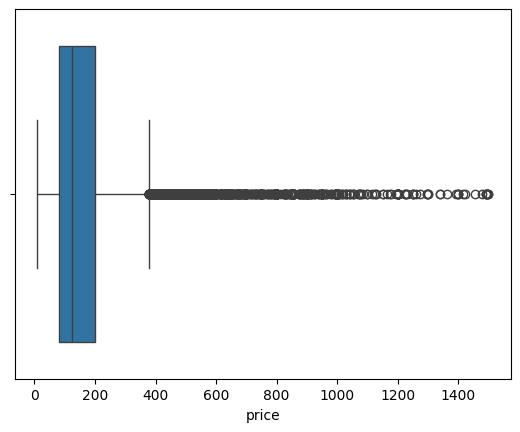

In [21]:
# IDENTIFYING OUTLIERS IN PRICE
df=data[data['price']<1500]
sns.boxplot(data=df,x='price')
plt.show()

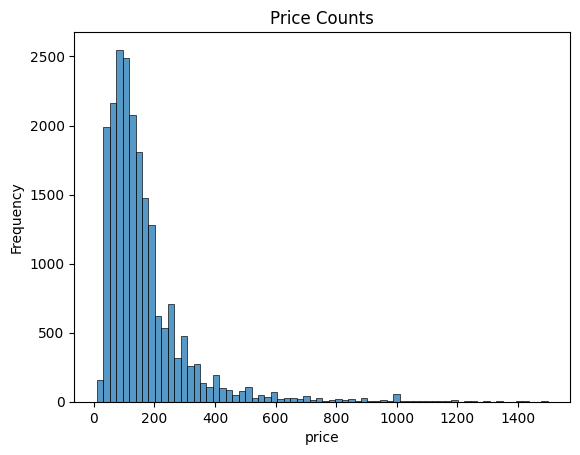

In [28]:
sns.histplot(data=df,x='price',bins=70)

plt.ylabel("Frequency")
plt.title("Price Counts")
plt.show()

In [29]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

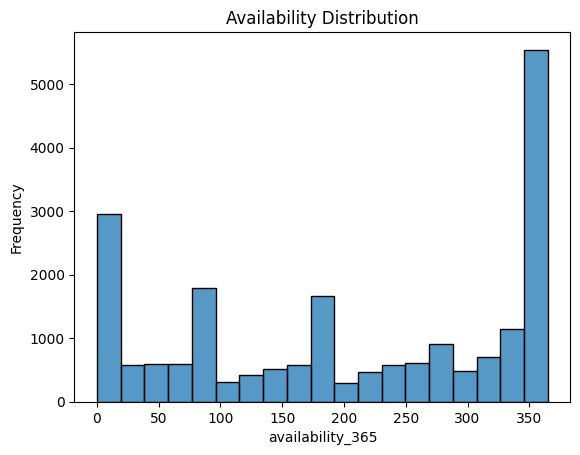

In [33]:
#AVAILABILITY DISTRIBUTION
sns.histplot(data=data,x='availability_365')

plt.ylabel("Frequency")
plt.title("Availability Distribution")
plt.show()

In [38]:
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price_per_bed, dtype: float64

# FEATURE ENGINEERING

In [36]:
# NEW COLUMN ['price_per_bed']
df['price_per_bed']=df['price']/df['beds']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5852\1178097762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_bed']=df['price']/df['beds']


In [37]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price_per_bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


# bivariate analysis

In [39]:
df.columns



Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price_per_bed'],
      dtype='object')

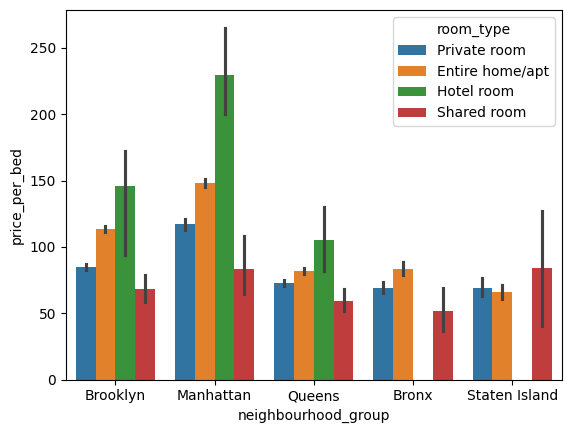

In [42]:
sns.barplot(data=df,x='neighbourhood_group',y='price_per_bed',hue='room_type')
plt.show()

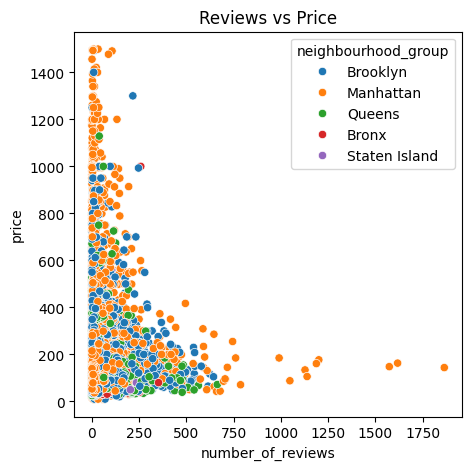

In [45]:
# number of reviews vs price
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='number_of_reviews',y='price',hue='neighbourhood_group')
plt.title("Reviews vs Price")
plt.show()

In [46]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price_per_bed                     float64
dtype: object

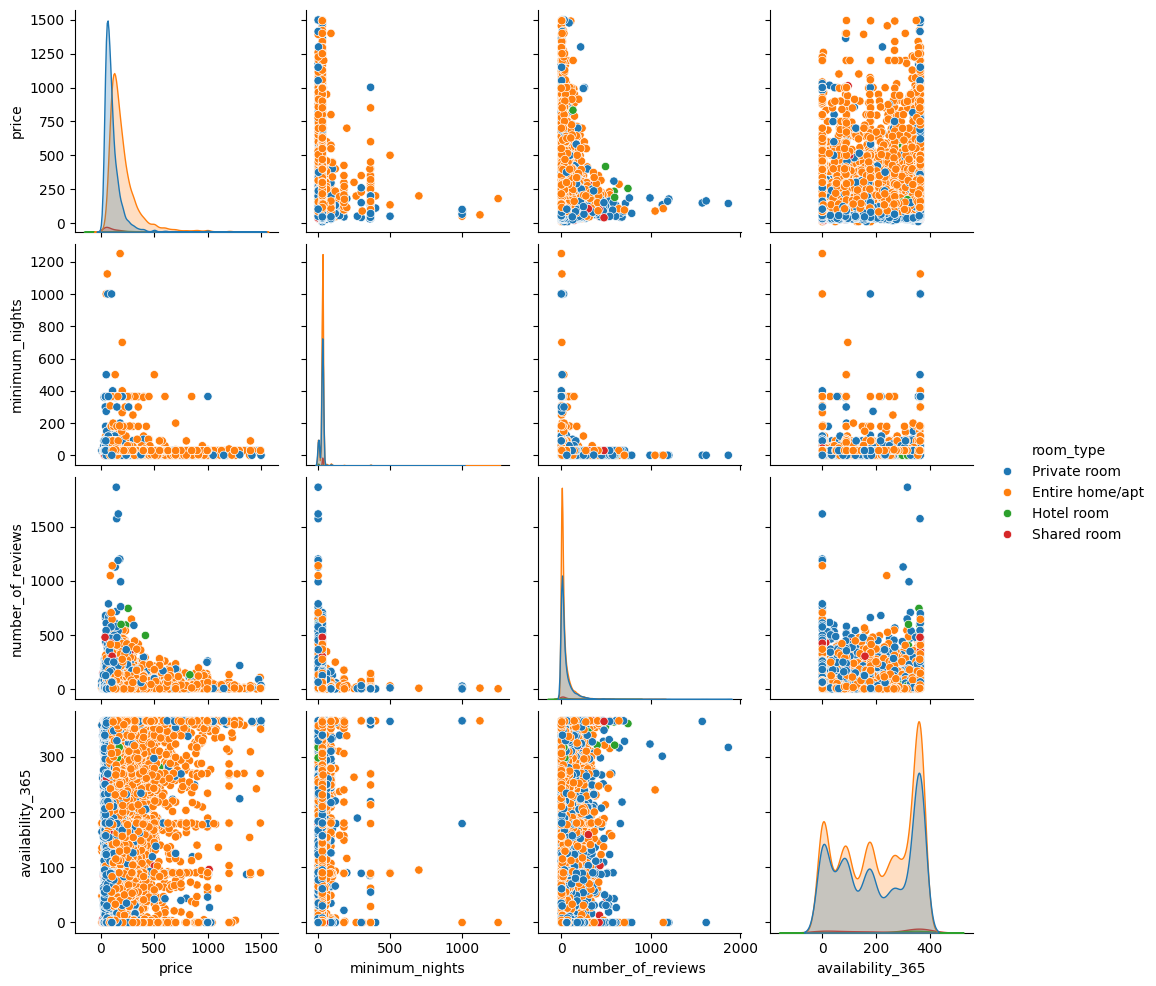

In [49]:
sns.pairplot(data=df,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type')
plt.show()

In [52]:
# heatmap correlation
corr=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


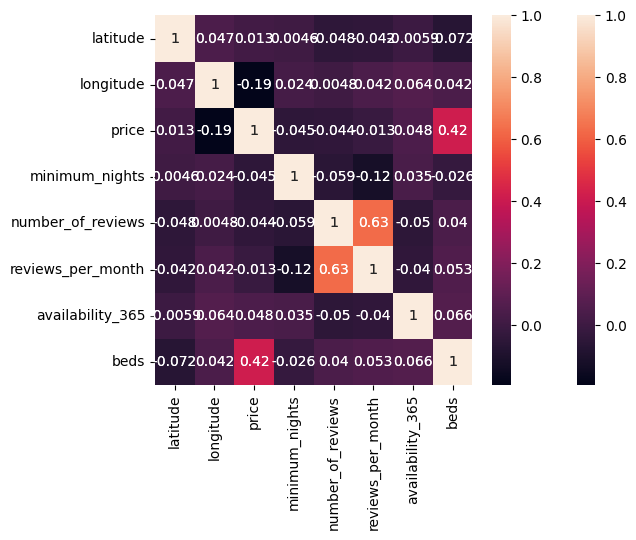

In [54]:
sns.heatmap(data=corr,annot=True)
plt.show()